In [1]:
#Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Load data
df_raw = pd.read_excel('pqmt2.xlsx')

In [3]:
df_raw.head()

Evaluation ID    Status  Visit #: Administrative Requirements  \
0          11604  Approved       1.0                           *   
1          11912  Approved       1.0                           *   
2          11919     Draft       NaN                           *   
3          11923  Approved       1.0                           *   
4          11924  Approved       1.0                           *   

  Program workscope is submitted on time and approved  \
0                                                Yes    
1                                                Yes    
2                                                NaN    
3                                                Yes    
4                                                Yes    

  Program budget is submitted on time and approved  \
0                                              Yes   
1                                              Yes   
2                                              NaN   
3                                              Yes   
4                                              Yes   

  Program reports are submitted on time  \
0                                   Yes   
1                                   Yes   
2                                   NaN   
3                                   Yes   
4                                   NaN   

  Program has provided accurate and up-to-date contact information  \
0                                                Yes                 
1                                                Yes                 
2                                                NaN                 
3                                                Yes                 
4                                                Yes                 

  Program enters data into DYCD MIS systems on time and accurately  \
0                                                Yes                 
1                                                Yes                 
2                                                NaN                 
3                                                Yes                 
4                                                Yes                 

  Program meets licensing requirements      ...        \
0                                  Yes      ...         
1                                  Inc      ...         
2                                  NaN      ...         
3                                  Yes      ...         
4                                  Inc      ...         

  Provides assistance in locating job and/or training opportunities and services (e.g., employment/career counseling, job training)  \
0                                                NaN                                                                                  
1                                                N/O                                                                                  
2                                                NaN                                                                                  
3                                                N/O                                                                                  
4                                                NaN                                                                                  

  Offers activities or workshops that address gender and social roles  \
0                                                NaN                    
1                                                N/O                    
2                                                NaN                    
3                                                N/O                    
4                                                NaN                    

  Provides health/nutrition instruction Provides individual/family counseling  \
0                                   NaN                                   NaN   
1                                   N/O                               

In [4]:
df_raw.describe()

Evaluation ID     Visit #:  ROP or ADA or ADP  \
count    1767.000000  1741.000000        1742.000000   
mean    14092.140351     1.570936          59.574689   
std      1409.230756     0.606710          29.622345   
min     11604.000000     1.000000           0.000000   
25%     12852.000000     1.000000          33.425000   
50%     14213.000000     2.000000          65.450000   
75%     15317.500000     2.000000          84.000000   
max     17086.000000     4.000000         160.000000   

       # of Contracted Participants (or Service Level)  \
count                                      1757.000000   
mean                                        110.153671   
std                                          49.232507   
min                                           0.000000   
25%                                          80.000000   
50%                                         100.000000   
75%                                         141.000000   
max                                         335.000000   

       # of Enrolled (or Validated) Participants  \
count                                1757.000000   
mean                                  129.754696   
std                                   248.502455   
min                                     0.000000   
25%                                    86.000000   
50%                                   117.000000   
75%                                   157.000000   
max                                 10177.000000   

       # of Participants Present at Visit  Program Manager ID  Supervisor ID  
count                         1712.000000         1756.000000    1751.000000  
mean                            79.481308          669.846241     503.955454  
std                             49.991393          119.206036     112.874571  
min                              2.000000          390.000000     342.000000  
25%                             42.000000          619.000000     398.000000  
50%                             72.000000          650.000000     467.000000  
75%                            110.250000          791.000000     621.000000  
max                            371.000000          811.000000     706.000000

In [5]:
#Select only approved evaluations
df_raw = df_raw[df_raw['Status'] == 'Approved']

In [6]:
df_raw.shape

(1749, 101)

There are 1749 approved evaluations, with 101 separate indicators, ratings, or information areas.

In [7]:
#Examine columns
i=0
for x in df_raw.columns:
    print(i, x)
    i += 1

0 Evaluation ID
1 Status
2 Visit #:
3 Administrative Requirements
4 Program workscope is submitted on time and approved
5 Program budget is submitted on time and approved
6 Program reports are submitted on time
7 Program has provided accurate and up-to-date contact information
8 Program enters data into DYCD MIS systems on time and accurately
9 Program meets licensing requirements
10 Program has a staff handbook that describes internal policies and procedures
11 Program maintains a record of incident reports
12 Program maintains a log of required fire/safety drills
13 Program maintains complete participant files including, as appropriate: registration forms, medical records, consent forms, assessments, case management files
14 Program maintains complete staff personnel files, including, as appropriate: fingerprint records and other clearances, resumes (staff & volunteers), evaluations
15 Program maintains a written agreement and/or lease agreement between the provider/program and the h

## Data Discussion
Data comes from site visit evaluations for NYC DYCD-funded after-school youth programs during FY2017. Evaluators respond to 80 indicators related to program administration, compliance, practices, and outputs, then give section and overall ratings. Most indicators are self-explanatory. ROP is the Rate of Participation by youth, which is the primary output measure. Indicators in the Program Content section are sparsely populated because only a subset of activity types will be observed during a single site visit.

## Responses
| Response | Note |
|---|---|
| Yes | Standard is met for indicator |
| PTL | Partial standard is met |
| Inc | Incomplete (similar to PTL) |
| No | Standard is not met |
| N/A | Indicator is not applicable for this program |
| N/O | Indicator was not observed during visit |
| (Ratings) | Excellent, Good, Fair, Poor, Unsatisfactory |




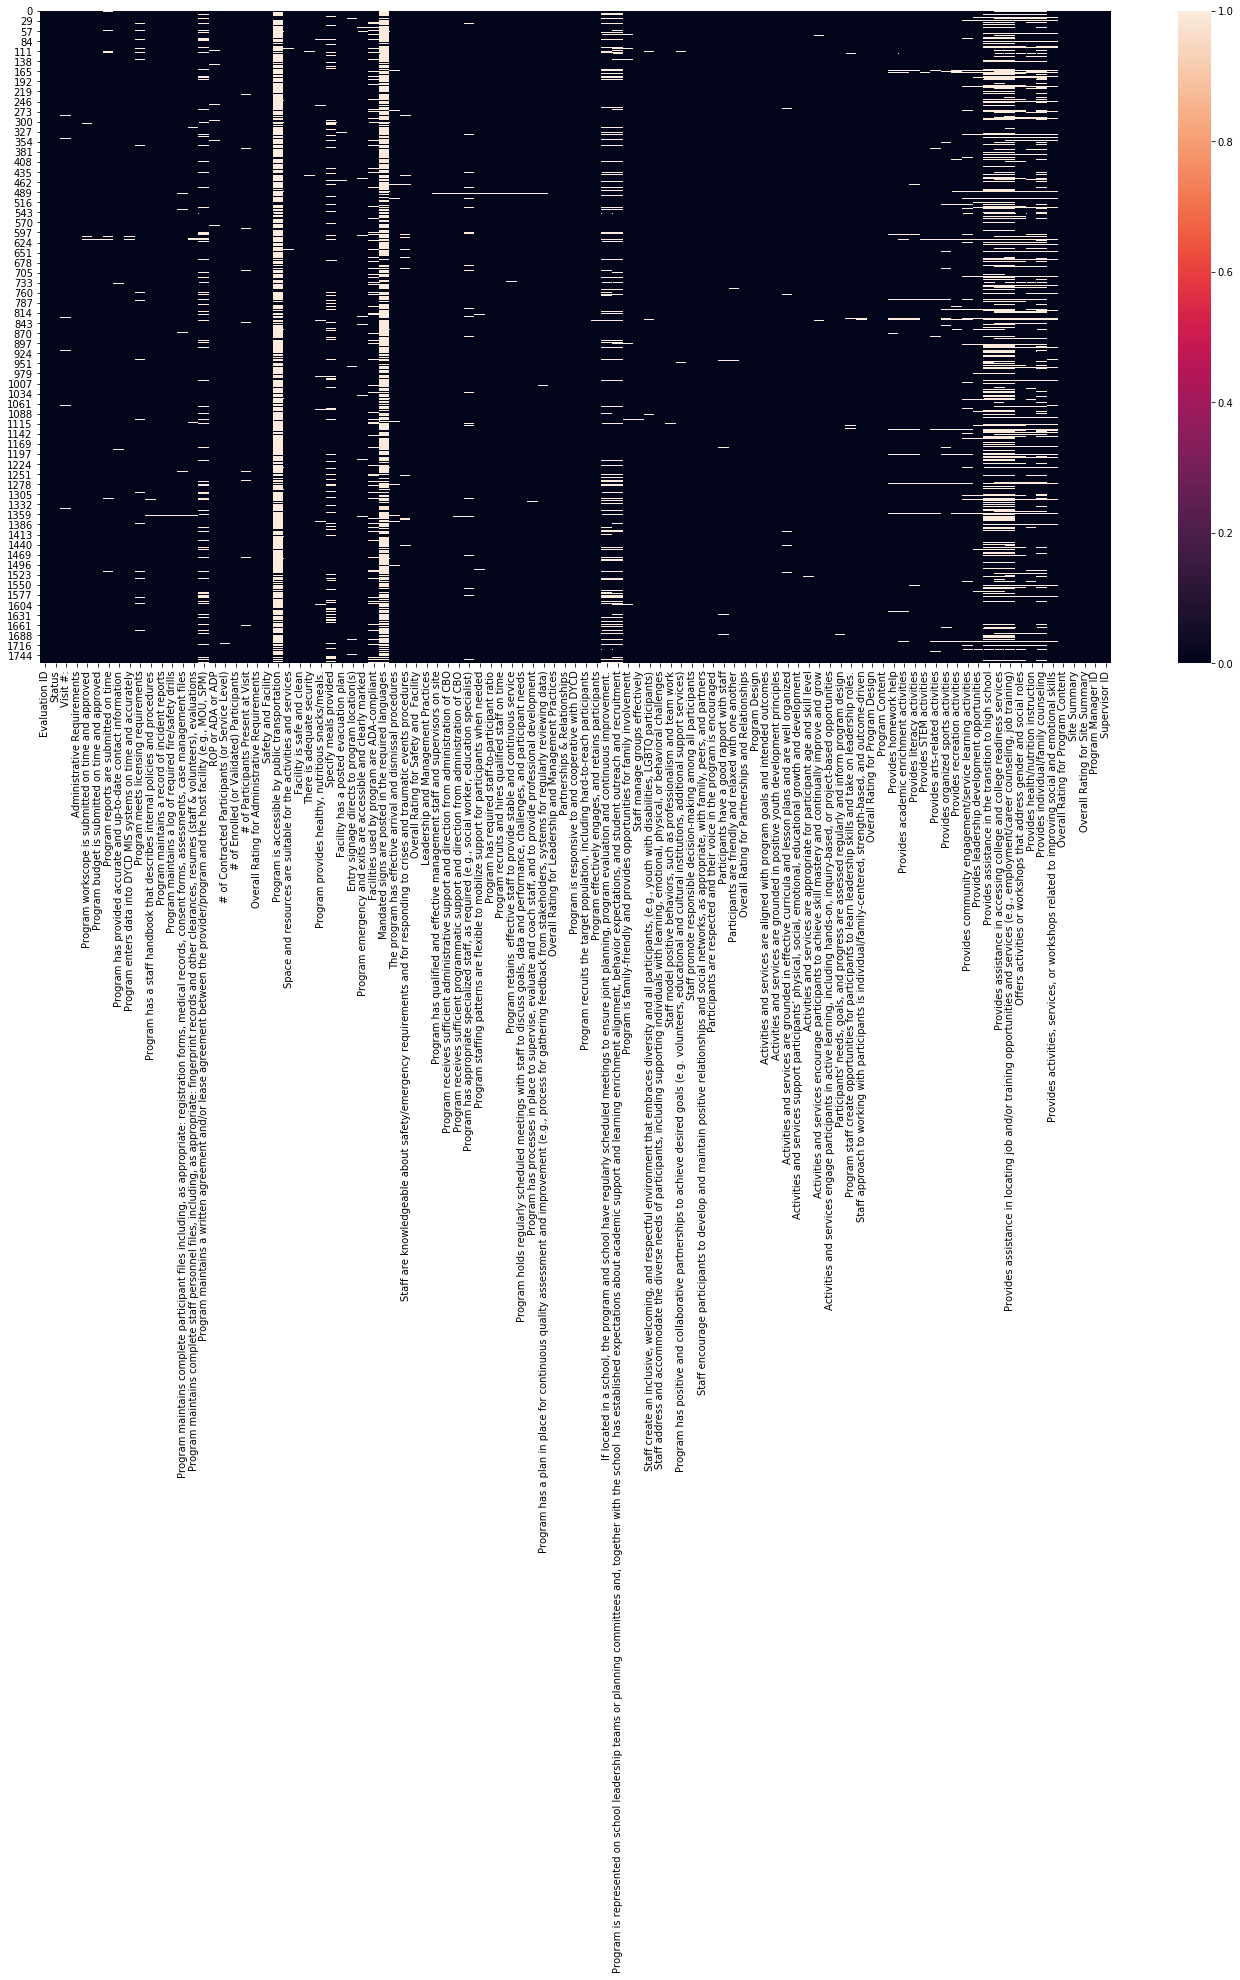

In [8]:
#Map null values in the data set
plt.figure(num=1, figsize=(24, 12));
sns.heatmap(df_raw.isnull().replace({True: 1, False: 0}));

There are several columns with a high percentage of null values, and a few rows with a higher percentage of nulls.

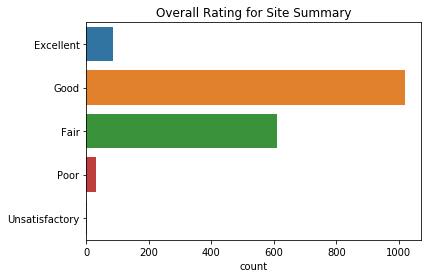

In [9]:
sns.countplot(y='Overall Rating for Site Summary', data=df_raw, order=['Excellent', 'Good', 'Fair', 'Poor', 'Unsatisfactory']);
plt.title('Overall Rating for Site Summary');
plt.ylabel('');

A majority (58%) of site visit overall ratings are Good, with Fair representing over a third (34%). Excellent, Poor, and Unsatisfactory ratings are less frequent.

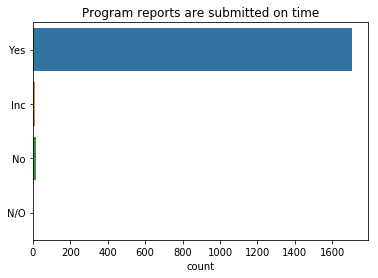

In [10]:
sns.countplot(y='Program reports are submitted on time', data=df_raw, order=['Yes', 'Inc', 'No', 'N/O']);
plt.title('Program reports are submitted on time');
plt.ylabel('');

The vast majority of Yes/No responses are Yes.

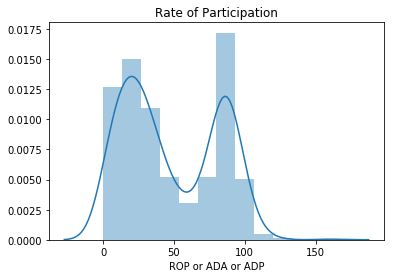

In [12]:
sns.distplot(df_raw[df_raw['Visit #:'] == 1]['ROP or ADA or ADP'].dropna());
plt.title('Rate of Participation');

Rate of Participation at the first site visit is bimodal. Evaluators report that some sites have a slower start to the program year, while others are performing at target throughout.

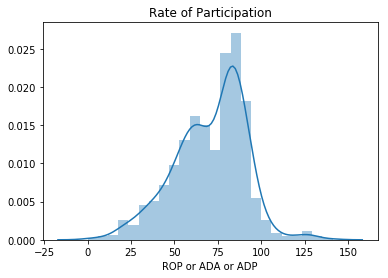

In [13]:
sns.distplot(df_raw[df_raw['Visit #:'] == 2]['ROP or ADA or ADP'].dropna());
plt.title('Rate of Participation');

By site visit 2, the gap still exists but has narrowed.

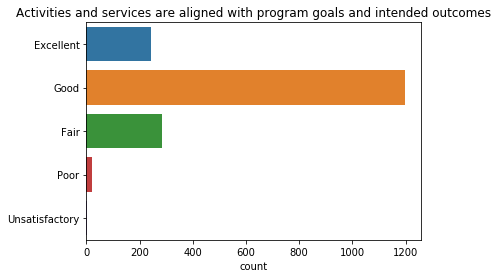

In [15]:
sns.countplot(y='Activities and services are aligned with program goals and intended outcomes', data=df_raw, 
              order=['Excellent', 'Good', 'Fair', 'Poor', 'Unsatisfactory']);
plt.ylabel('');
plt.title('Activities and services are aligned with program goals and intended outcomes');

A large majority (69%) of program description indicators are rated Good. Fair and Excellent responses are roughly equal, while Poor and Unsatisfactory are rare.

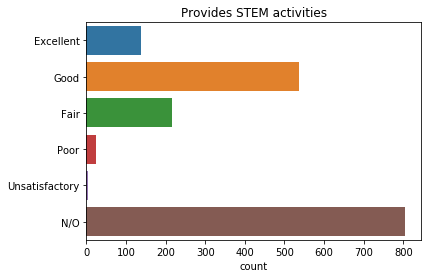

In [16]:
sns.countplot(y='Provides STEM activities', data=df_raw, order=['Excellent', 'Good', 'Fair', 'Poor', 'Unsatisfactory', 'N/O']);
plt.ylabel('');
plt.title('Provides STEM activities');

There are multiple activity types, but only a few activities will be directly observed during the site visit. Here, almost half of responses (46%) are listed as Not Observed. Among those activities that are observed, the distribution is similar to the program descriptions.

In [69]:
df = df_raw.drop('Status', axis=1)

In [70]:
df.head()

Evaluation ID  Visit #: Administrative Requirements  \
0          11604       1.0                           *   
1          11912       1.0                           *   
3          11923       1.0                           *   
4          11924       1.0                           *   
5          11922       1.0                           *   

  Program workscope is submitted on time and approved  \
0                                                Yes    
1                                                Yes    
3                                                Yes    
4                                                Yes    
5                                                Yes    

  Program budget is submitted on time and approved  \
0                                              Yes   
1                                              Yes   
3                                              Yes   
4                                              Yes   
5                                              Yes   

  Program reports are submitted on time  \
0                                   Yes   
1                                   Yes   
3                                   Yes   
4                                   NaN   
5                                   Yes   

  Program has provided accurate and up-to-date contact information  \
0                                                Yes                 
1                                                Yes                 
3                                                Yes                 
4                                                Yes                 
5                                                Yes                 

  Program enters data into DYCD MIS systems on time and accurately  \
0                                                Yes                 
1                                                Yes                 
3                                                Yes                 
4                                                Yes                 
5                                                Yes                 

  Program meets licensing requirements  \
0                                  Yes   
1                                  Inc   
3                                  Yes   
4                                  Inc   
5                                  Yes   

  Program has a staff handbook that describes internal policies and procedures  \
0                                                Yes                             
1                                                Yes                             
3                                                Yes                             
4                                                Yes                             
5                                                Yes                             

       ...       \
0      ...        
1      ...        
3      ...        
4      ...        
5      ...        

  Provides assistance in locating job and/or training opportunities and services (e.g., employment/career counseling, job training)  \
0                                                NaN                                                                                  
1                                                N/O                                                                                  
3                                                N/O                                                                                  
4                                                NaN                                                                                  
5                                                N/O                                                                                  

  Offers activities or workshops that address gender and social roles  \
0                                                NaN                    
1                                                N/O               

In [71]:
#Examine values
for x in df.columns:
    print(df.groupby([x]).size())

Evaluation ID
11604    1
11646    1
11647    1
11648    1
11649    1
11650    1
11651    1
11652    1
11653    1
11654    1
11655    1
11656    1
11657    1
11658    1
11659    1
11660    1
11661    1
11662    1
11664    1
11665    1
11666    1
11667    1
11668    1
11669    1
11670    1
11671    1
11672    1
11673    1
11674    1
11675    1
        ..
16301    1
16304    1
16314    1
16317    1
16318    1
16325    1
16333    1
16334    1
16336    1
16356    1
16378    1
16382    1
16384    1
16408    1
16419    1
16424    1
16431    1
16469    1
16518    1
16713    1
16897    1
16929    1
16942    1
16948    1
16959    1
16960    1
17043    1
17052    1
17064    1
17082    1
Length: 1749, dtype: int64
Visit #:
1.0    850
2.0    781
3.0    101
4.0      1
dtype: int64
Administrative Requirements
*    1749
dtype: int64
Program workscope is submitted on time and approved
Inc       2
No       14
Yes    1727
dtype: int64
Program budget is submitted on time and approved
Inc       3
No       

The vast majority of Y/N indicators receive a Yes response. The majority of five-point ratings are given as a Good

In [72]:
#Replace inapplicable text with NaN
df.replace({'N/A': np.nan, 'N/O': np.nan, '*': np.nan}, inplace=True)

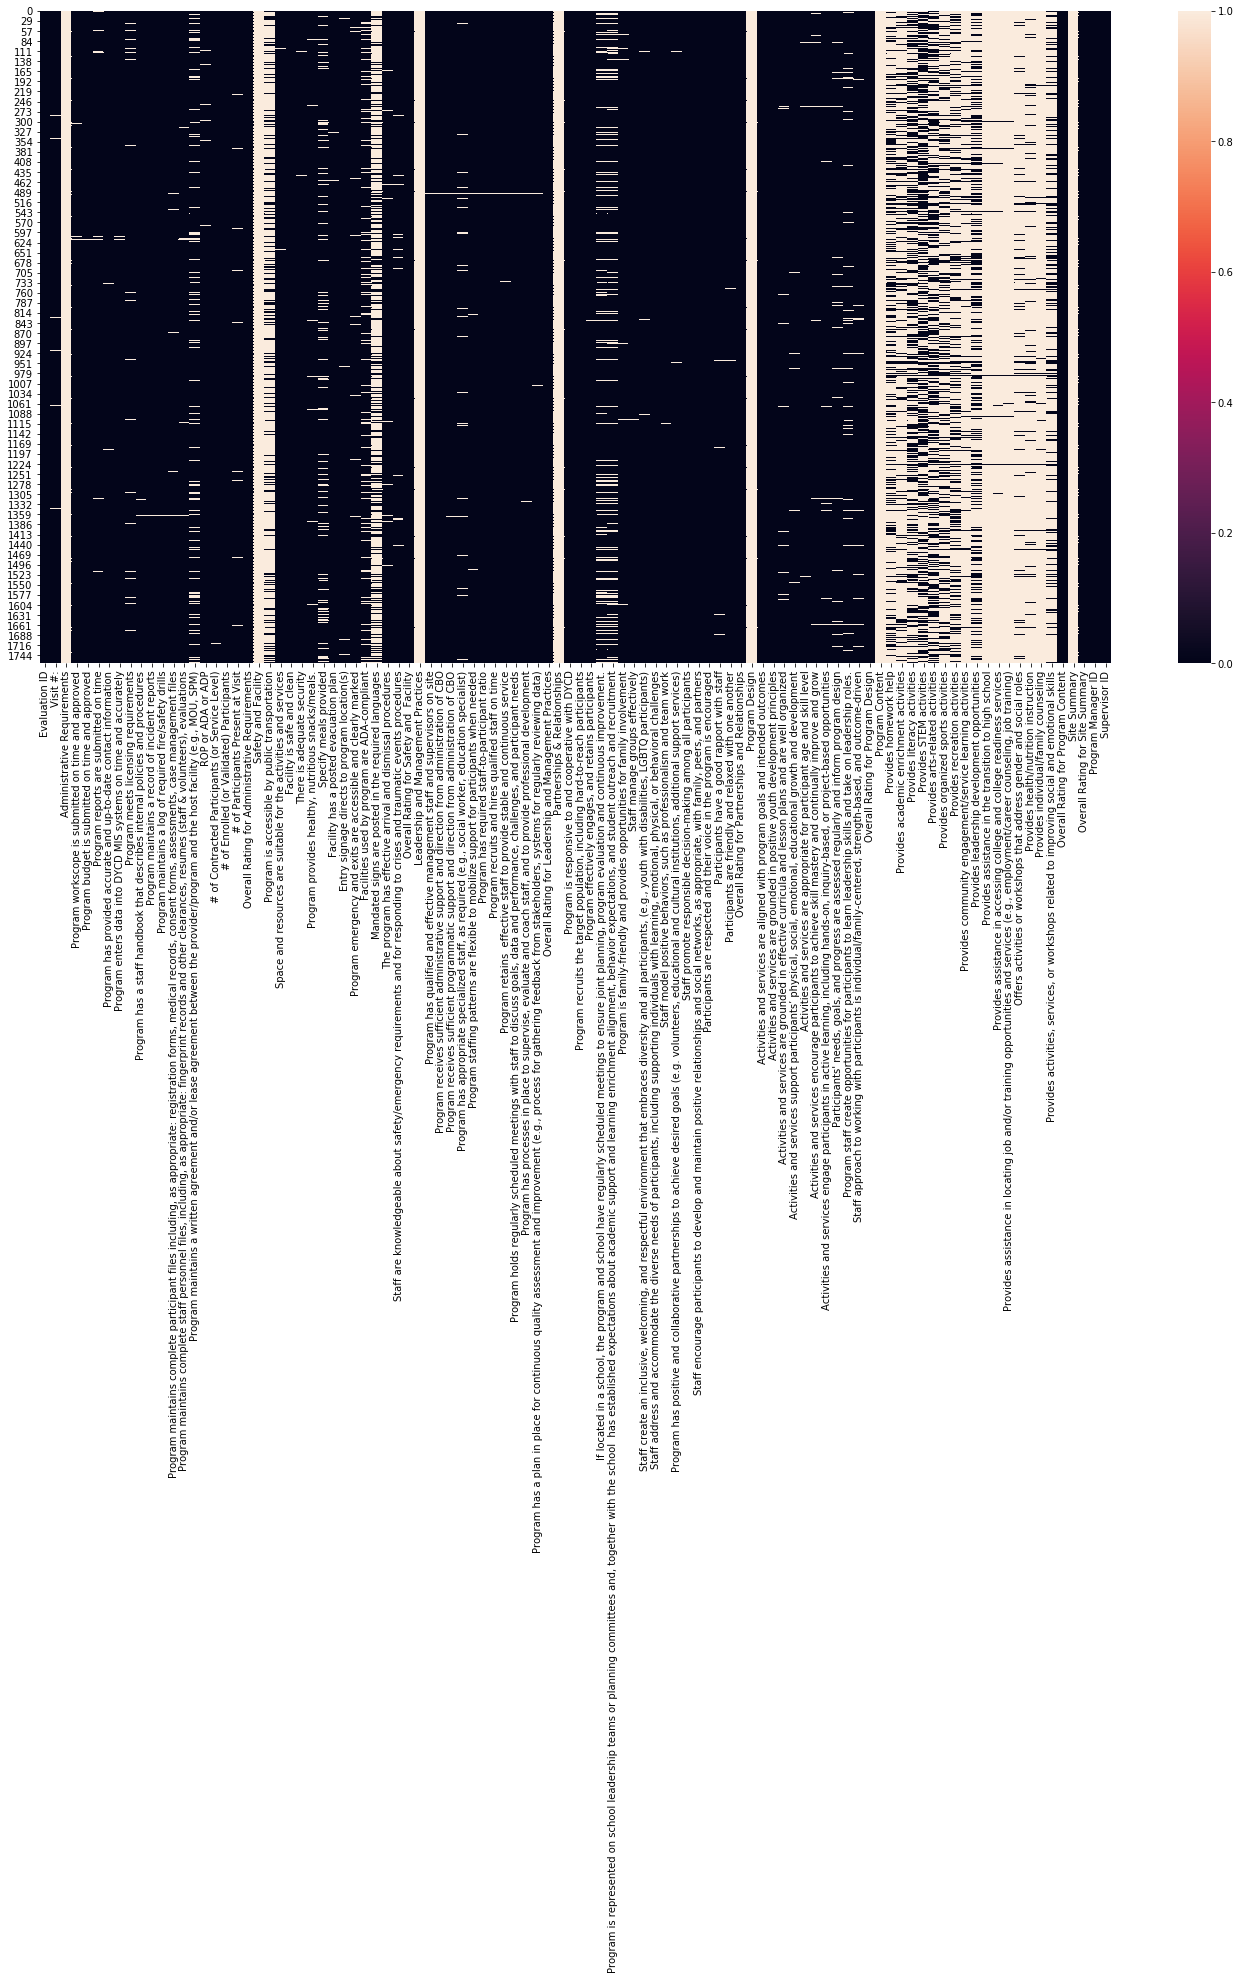

In [73]:
plt.figure(num=1, figsize=(24, 12));
sns.heatmap(df.isnull().replace({True: 1, False: 0}));

Many more nulls have been identified now that values that were effectively null have been exposed.

In [74]:
#Create dummy variables for the PM identity
PM = pd.get_dummies(df['Program Manager ID'], prefix='PM', drop_first=True)

In [75]:
#Drop supervisor and PM
df.drop('Supervisor ID', axis=1, inplace=True)

In [76]:
df.drop('Program Manager ID', axis=1, inplace=True)

In [77]:
#Drop any row missing Overall Rating, Contracted Participants, Enrolled Participants, or Present Participants
df.dropna(axis=0, how='any', subset=['Overall Rating for Site Summary'], inplace=True)
df.dropna(axis=0, how='any', subset=['# of Contracted Participants (or Service Level)'], inplace=True)
df.dropna(axis=0, how='any', subset=['# of Enrolled (or Validated) Participants'], inplace=True)
df.dropna(axis=0, how='any', subset=['# of Participants Present at Visit'], inplace=True)

In [78]:
#Create features for Enrolled as a percent of Contracted, and Present as a percent of Enrolled, then drop the original columns
df['Enrolled / Contracted'] = df['# of Enrolled (or Validated) Participants'] / df['# of Contracted Participants (or Service Level)']

In [79]:
df['Present / Enrolled'] = df['# of Participants Present at Visit'] / df['# of Enrolled (or Validated) Participants']

In [80]:
df.drop('# of Contracted Participants (or Service Level)',axis=1,inplace=True)
df.drop('# of Enrolled (or Validated) Participants',axis=1,inplace=True)
df.drop('# of Participants Present at Visit',axis=1,inplace=True)

In [81]:
#subset sparse activity columns
act_cols = ['Provides homework help', 'Provides academic enrichment activities', 'Provides literacy activities', 
            'Provides STEM activities', 'Provides arts-related activities', 'Provides organized sports activities',
            'Provides recreation activities', 'Provides community engagement/service learning activities', 
            'Provides leadership development opportunities', 'Provides assistance in the transition to high school', 
            'Provides assistance in accessing college and college readiness services', 
            'Provides assistance in locating job and/or training opportunities and services (e.g., employment/career counseling, job training)',
            'Offers activities or workshops that address gender and social roles', 'Provides health/nutrition instruction', 
            'Provides individual/family counseling', 'Provides activities, services, or workshops related to improving social and emotional skills']


In [82]:
#Create average activtiy ratings per site
df['Avg_act'] = df[act_cols].replace({'Excellent': 1, 'Good': .75, 'Fair': .5, 'Poor': .25, 'Unsatisfactory': 0}
                                    ).mean(axis=1, numeric_only=True)


In [83]:
df['Avg_act'].head()

0    0.833333
1    0.666667
3    0.666667
4    0.625000
5    0.916667
Name: Avg_act, dtype: float64

In [84]:
#Create dummies of whether each activity was observed
for i in df[act_cols].columns:
    colname = i + '_dum'
    dums = pd.get_dummies(df[i])
    dums = dums.sum(axis=1)
    df[colname] = dums


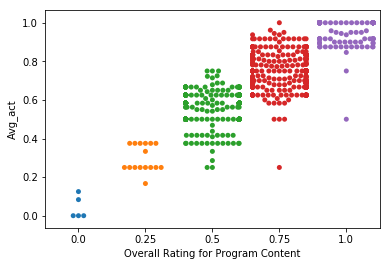

In [85]:
#Check fitness of new feature
sns.swarmplot(df['Overall Rating for Program Content'].replace(
    {'Excellent': 1, 'Good': .75, 'Fair': .5, 'Poor': .25, 'Unsatisfactory': 0}), df['Avg_act'])

Program content ratings were often too sparse to be useful, because only a few of the activity types would be observed on a particular visit. The average activity rating is calculated from the mean of ratings in the Program Content section. This average closely follows the section rating chosen by the evaluator. Program sites whose average activity ratings are far different from the Program Content section rating were flagged for review. Some Program Managers were overrepresented in this group.

In [86]:
#Examine nulls in columns
for x in df.columns:
    print(df[x].isnull().sum(), x)

0 Evaluation ID
15 Visit #:
1704 Administrative Requirements
6 Program workscope is submitted on time and approved
3 Program budget is submitted on time and approved
17 Program reports are submitted on time
2 Program has provided accurate and up-to-date contact information
3 Program enters data into DYCD MIS systems on time and accurately
63 Program meets licensing requirements
6 Program has a staff handbook that describes internal policies and procedures
4 Program maintains a record of incident reports
4 Program maintains a log of required fire/safety drills
6 Program maintains complete participant files including, as appropriate: registration forms, medical records, consent forms, assessments, case management files
9 Program maintains complete staff personnel files, including, as appropriate: fingerprint records and other clearances, resumes (staff & volunteers), evaluations
199 Program maintains a written agreement and/or lease agreement between the provider/program and the host fac

In [87]:
#drop columns with more than 50 nulls
df.dropna(axis=1, thresh=len(df)-50, inplace=True)

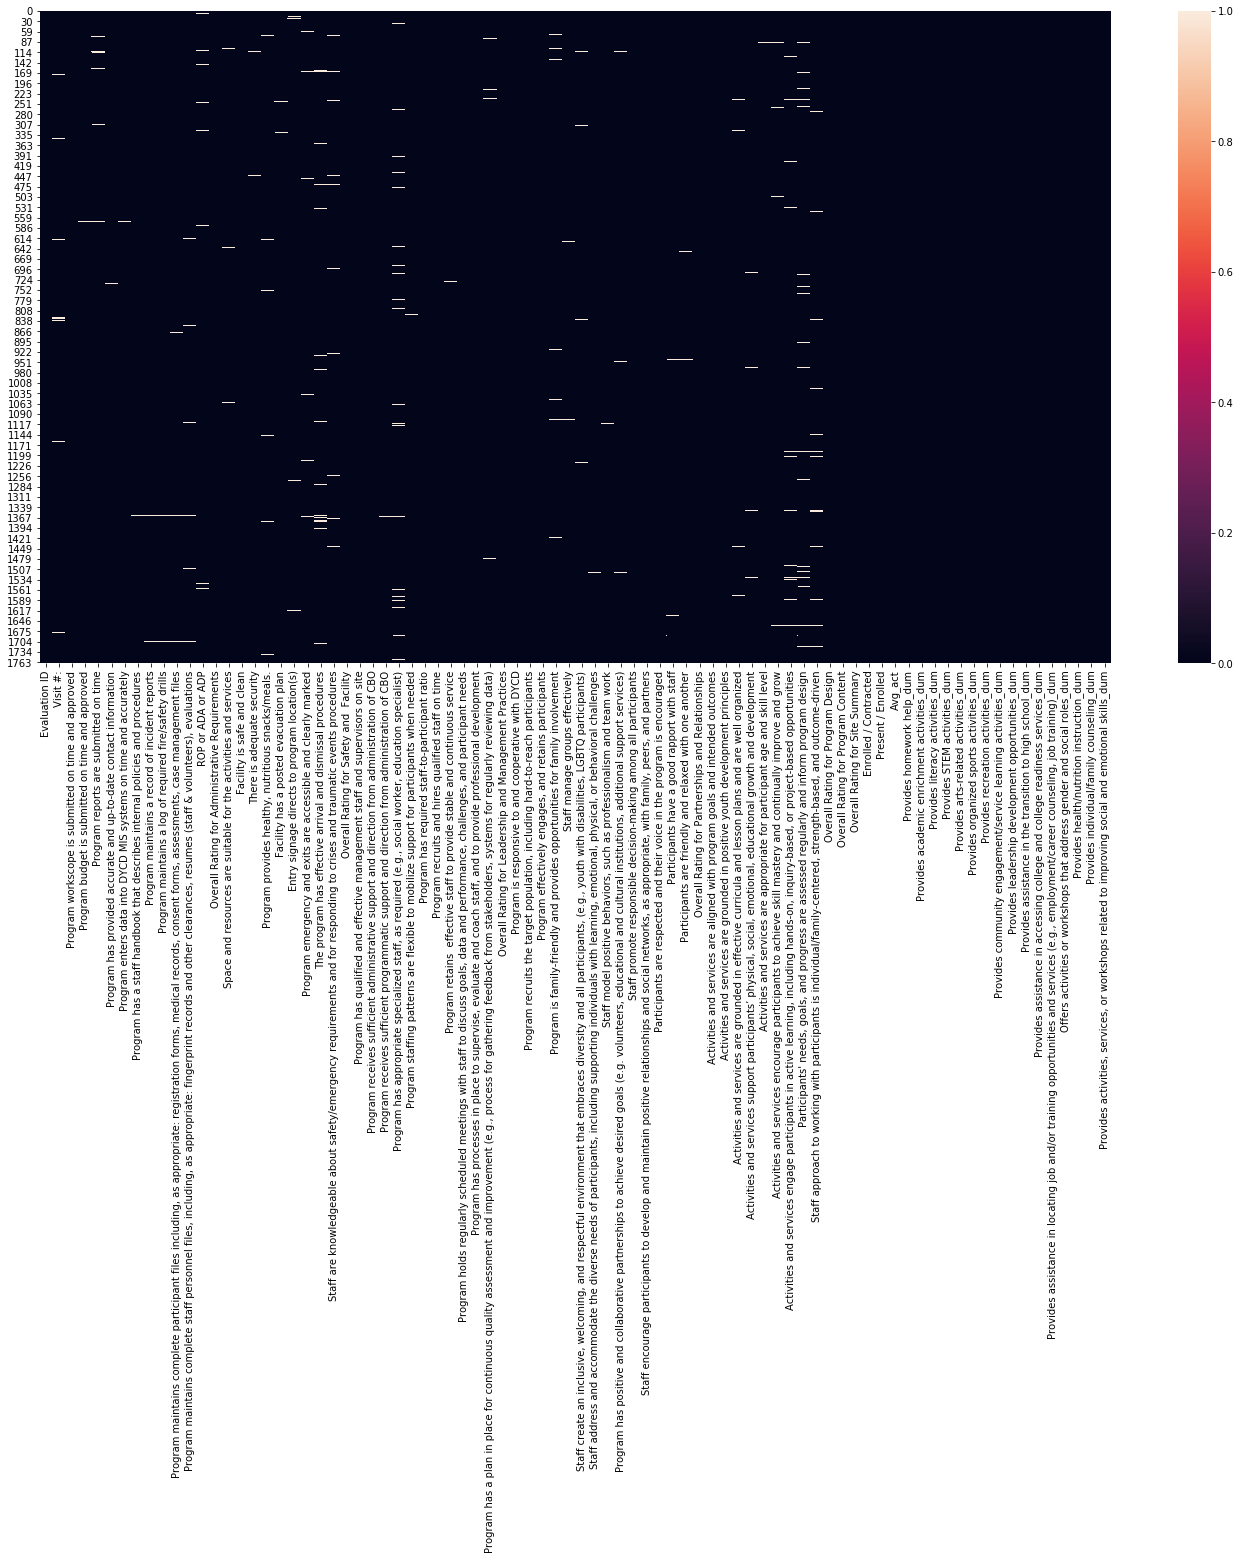

In [88]:
plt.figure(num=1, figsize=(24, 12));
sns.heatmap(df.isnull().replace({True: 1, False: 0}));

In [89]:
df.isnull().sum(axis=0).value_counts().sort_index()

0     24
1      6
2     10
3      8
4      5
5      3
6      6
7      2
9      3
13     2
15     2
16     2
17     1
19     1
20     1
21     2
22     1
31     1
46     1
48     1
dtype: int64

In [90]:
#Examine missing values by row
df.isnull().sum(axis=1).value_counts().sort_index()

0     1369
1      266
2       41
3       13
4        6
5        2
6        3
9        1
12       2
23       1
dtype: int64

In [91]:
#drop rows with more than 10 nulls
df.dropna(axis=0, thresh=len(df.columns)-10, inplace=True)

In [92]:
#drop row with infinite
df.drop(617, axis=0, inplace=True)

In [93]:
#Remove targets
section_cols = ['Overall Rating for Administrative Requirements', 'Overall Rating for Safety and  Facility',
 'Overall Rating for Leadership and Management Practices',
 'Overall Rating for Partnerships and Relationships',
 'Overall Rating for Program Design',
 'Overall Rating for Program Content',
 'Overall Rating for Site Summary']
sections = df[section_cols]
df.drop(df[section_cols], axis=1, inplace=True)


In [94]:
sections.replace({'Unsatisfactory':'4Poor', 'Poor':'4Poor','Fair':'3Fair','Good':'2Good','Excellent':'1Excellent'}, inplace=True)

C:\Users\ittrain\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:4531: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  limit=limit, regex=regex)


In [95]:
#Replace with numerical values
df.replace({'Excellent': 1, 'Good': .75, 'Fair': .5, 'Poor': .25, 'Unsatisfactory': 0, 
            'Yes': 1, 'PTL': .5, 'Inc': .5, 'No': 0}, inplace=True)


In [96]:
#Fill remaining NaNs with median value
df = df.apply(lambda x: x.fillna(x.median()))

In [97]:
df.shape

(1700, 75)

In [98]:
df.describe()

Evaluation ID     Visit #:  \
count    1700.000000  1700.000000   
mean    14089.660588     1.573529   
std      1405.945244     0.602041   
min     11604.000000     1.000000   
25%     12849.250000     1.000000   
50%     14210.000000     2.000000   
75%     15313.250000     2.000000   
max     17082.000000     4.000000   

       Program workscope is submitted on time and approved  \
count                                        1700.000000     
mean                                            0.991176     
std                                             0.091959     
min                                             0.000000     
25%                                             1.000000     
50%                                             1.000000     
75%                                             1.000000     
max                                             1.000000     

       Program budget is submitted on time and approved  \
count                                       1700.000000   
mean                                           0.987353   
std                                            0.109786   
min                                            0.000000   
25%                                            1.000000   
50%                                            1.000000   
75%                                            1.000000   
max                                            1.000000   

       Program reports are submitted on time  \
count                            1700.000000   
mean                                0.987941   
std                                 0.102937   
min                                 0.000000   
25%                                 1.000000   
50%                                 1.000000   
75%                                 1.000000   
max                                 1.000000   

       Program has provided accurate and up-to-date contact information  \
count                                        1700.000000                  
mean                                            0.931765                  
std                                             0.227695                  
min                                             0.000000                  
25%                                             1.000000                  
50%                                             1.000000                  
75%                                             1.000000                  
max                                             1.000000                  

       Program enters data into DYCD MIS systems on time and accurately  \
count                                        1700.000000                  
mean                                            0.803529                  
std                                             0.359745                  
min                                             0.000000                  
25%                                             0.500000                  
50%                                             1.000000                  
75%                                             1.000000                  
max                                             1.000000                  

       Program has a staff handbook that describes internal policies and procedures  \
count                                        1700.000000                              
mean                                            0.997059                              
std                                             0.048432                              
min                                             0.000000                              
25%                                             1.000000                              
50%                                             1.000000                              
75%                                             1.000000                              
max                                             1.000000                              

       Progra

In [99]:
#Create and plot correlation matrix
corr_mat = df.corr()

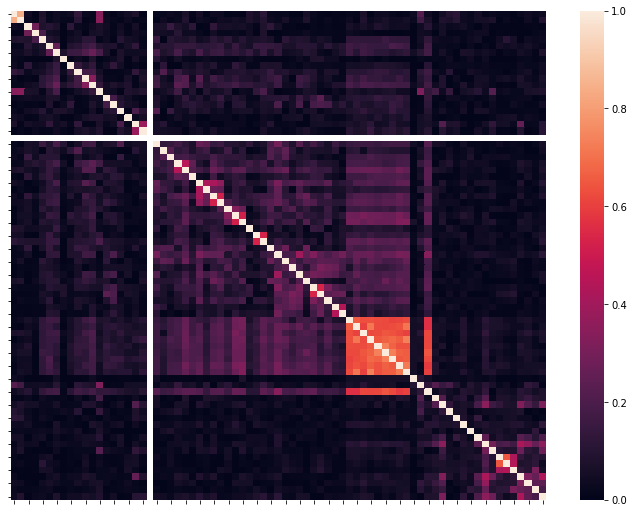

In [100]:
plt.figure(num=1, figsize=(12, 9));
ax = sns.heatmap(np.absolute(corr_mat));
ax.set_yticklabels([]);
ax.set_xticklabels([]);

Program descriptions (large red/orange square), particularly those that are thematically related, are highly correlated with each other and with the average activtiy rating (nearby red/orange lines). To a lesser extent, they are correlated with the Yes/No responses in other sections. Certain activity observation dummies are particularly correlated.

In [101]:
a_corr_mat = np.absolute(corr_mat)
s = a_corr_mat.unstack()
so = s.sort_values(kind='quicksort', ascending=False)

In [102]:
so[70:127]

Program has qualified and effective management staff and supervisors on site                                                       Program has qualified and effective management staff and supervisors on site                                                         1.000000
Staff are knowledgeable about safety/emergency requirements and for responding to crises and traumatic events procedures           Staff are knowledgeable about safety/emergency requirements and for responding to crises and traumatic events procedures             1.000000
Provides health/nutrition instruction_dum                                                                                          Provides health/nutrition instruction_dum                                                                                            1.000000
Evaluation ID                                                                                                                      Evaluation ID                                     

In [103]:
df_raw.groupby(['Program Manager ID'])['Facility has a posted evacuation plan'].value_counts()

Program Manager ID  Facility has a posted evacuation plan
390.0               Yes                                       2
394.0               Yes                                      43
402.0               Yes                                       1
404.0               Yes                                      47
409.0               Yes                                      45
415.0               Yes                                       2
480.0               Yes                                      47
520.0               Yes                                      48
542.0               Yes                                       3
                    No                                        1
583.0               Yes                                       5
584.0               Yes                                       6
605.0               Yes                                      46
616.0               Yes                                      51
617.0               Yes                       

In [104]:
df_raw[df_raw['Facility has a posted evacuation plan'] == 'No'].groupby(['Program Manager ID']).size()

Program Manager ID
542.0     1
630.0     2
633.0     2
639.0     1
677.0     3
793.0     3
798.0    35
799.0     1
804.0     1
dtype: int64

One Program Manager is a stickler for evacuation plans. One PM represents 70% of 'No' responses.

In [105]:
df.drop('Evaluation ID', inplace=True, axis=1)

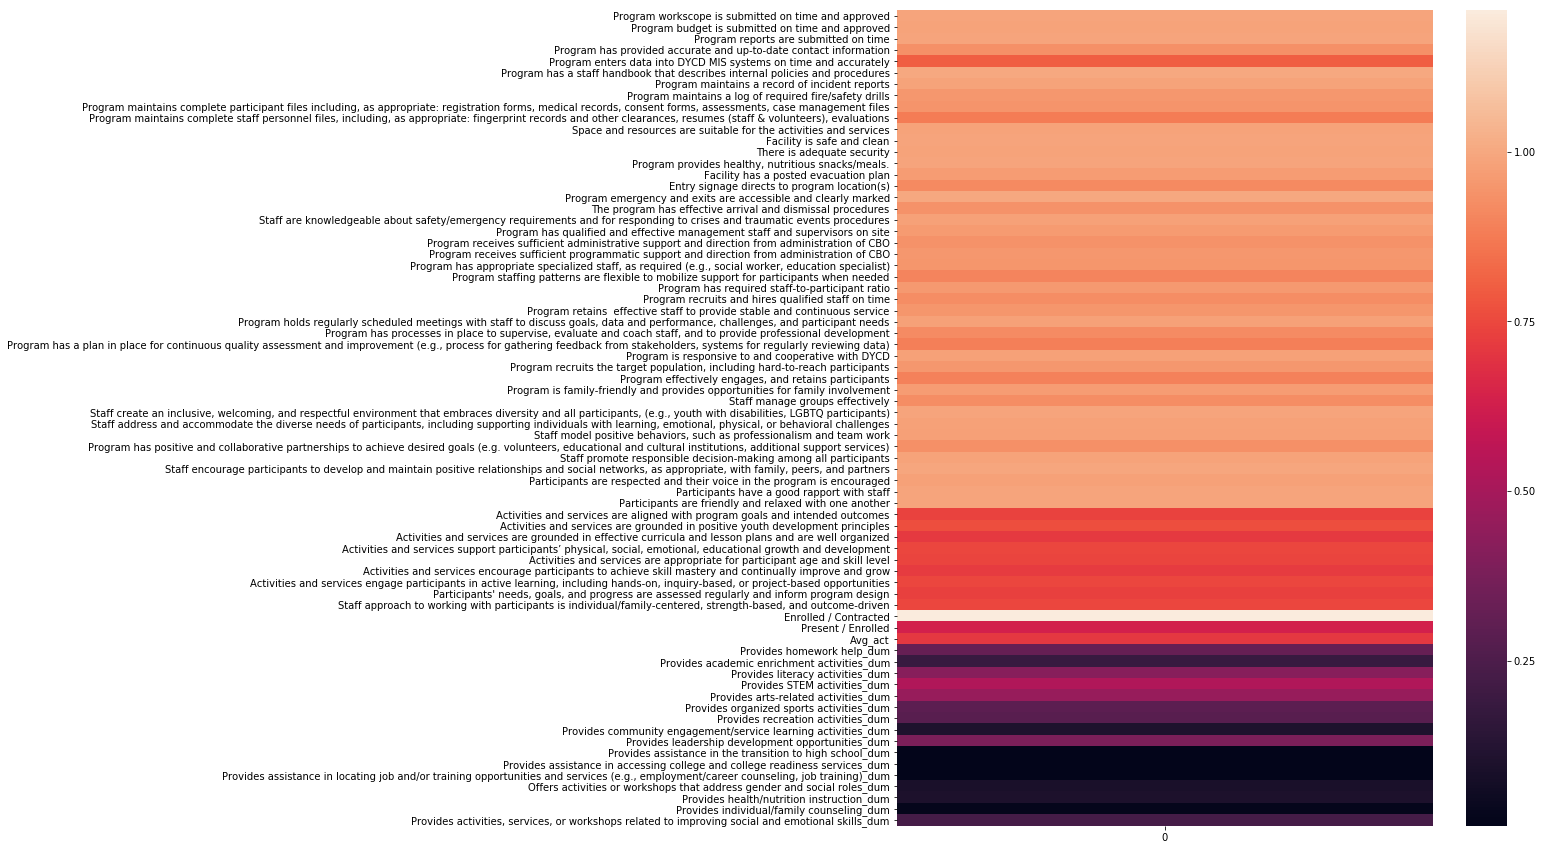

In [111]:
dfmap = df.drop(['ROP or ADA or ADP'], axis=1)
dfmap.drop(['Visit #:'], axis=1, inplace=True)
plt.figure(num=1, figsize=(12, 15));
sns.heatmap(pd.DataFrame(dfmap.mean(axis=0)));

Mean scores show that most Yes/No questions are almost always answered Yes. The lowest mean here was for entering data on time. Mean scores for program descriptions were roughly equivalent. Certain activity observations (STEM, arts, literacy, leadership development in particular) were must more common than others. 

## Discussion
Numerical values are assigned evenly spaced for categorical rating choices. Section and overall ratings are intended to be determined by the indicator responses. 

Average activity observation score is calculated as an attempt to deal with sparse data. The assumption is that program content section rating is based on the aggregate of activities observed. Plotting indicates this to be a good proxy. There is also a hypothesis that the particular activities observed on a visit (and not just their quality) have an effect on the overall rating.

## Modeling

In [112]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline

In [113]:
y = sections['Overall Rating for Site Summary']

In [114]:
X_train, X_test, y_train, y_test = train_test_split(df, y, train_size=.5)

C:\Users\ittrain\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


The data set is split evenly for train and test. When the initial modeling is completed, the train and test group can be reversed in order to have examined all of the data.

## Dummy Model

In [235]:
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy='stratified')

In [236]:
dummy.fit(X_train, y_train)

DummyClassifier(constant=None, random_state=None, strategy='stratified')

In [237]:
dumpred = dummy.predict(X_test)

In [238]:
print(classification_report(y_train, dumpred))

             precision    recall  f1-score   support

 1Excellent       0.02      0.02      0.02        43
      2Good       0.56      0.56      0.56       492
      3Fair       0.32      0.31      0.31       301
      4Poor       0.05      0.07      0.06        14

avg / total       0.44      0.44      0.44       850



In [239]:
print(confusion_matrix(y_train, dumpred))

[[  1  26  14   2]
 [ 28 276 179   9]
 [ 22 180  92   7]
 [  2   8   3   1]]


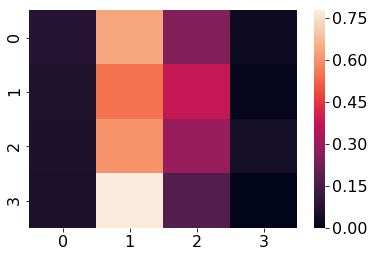

In [240]:
cmat=confusion_matrix(y_test, dumpred)
cmat = cmat.astype('float') / cmat.sum(axis=1)[:, np.newaxis]
sns.heatmap(cmat)

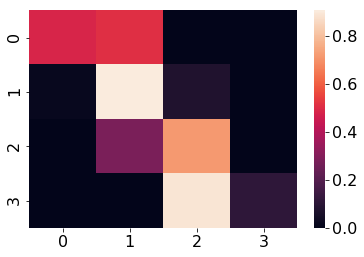

In [241]:
cmat2 = confusion_matrix(y_test, pred2)
cmat2 = cmat2.astype('float') / cmat2.sum(axis=1)[:, np.newaxis]
sns.heatmap(cmat2)

In [242]:
dprob = dummy.predict_proba(X_test)

In [243]:
dProb = pd.DataFrame(data=dprob, index=X_test.index, columns=['P_Exc', 'P_Good', 'P_Fair', 'P_Poor'])

In [247]:
dummy2 = DummyClassifier(strategy='uniform')

dummy2.fit(X_train, y_train)

dumpred2 = dummy2.predict(X_test)

print(classification_report(y_train, dumpred2))

             precision    recall  f1-score   support

 1Excellent       0.04      0.19      0.06        43
      2Good       0.56      0.27      0.36       492
      3Fair       0.34      0.21      0.26       301
      4Poor       0.02      0.36      0.04        14

avg / total       0.45      0.25      0.31       850



Uniform and stratified dummy models provide baseline for assessing other models.

## Fit model based on indicators (without PM ID)

In [115]:
rf = RandomForestClassifier(n_estimators=1000)

In [116]:
params = {
    'max_depth': [5,10,20,30,40,50,60,70,80]
}

In [139]:
grid=GridSearchCV(rf, param_grid=params)

In [140]:
grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [5, 10, 20, 30, 40, 50, 60, 70, 80]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [141]:
grid.best_params_

{'max_depth': 20}

In [142]:
pred1 = grid.predict(X_train)
print(classification_report(y_train, pred1))

             precision    recall  f1-score   support

 1Excellent       1.00      1.00      1.00        43
      2Good       1.00      1.00      1.00       492
      3Fair       1.00      0.99      1.00       301
      4Poor       1.00      1.00      1.00        14

avg / total       1.00      1.00      1.00       850



In [143]:
print(confusion_matrix(y_train, pred1))

[[ 43   0   0   0]
 [  0 492   0   0]
 [  0   2 299   0]
 [  0   0   0  14]]


In [144]:
pred2 = grid.predict(X_test)
print(classification_report(y_test, pred2))

             precision    recall  f1-score   support

 1Excellent       0.68      0.49      0.57        39
      2Good       0.82      0.91      0.86       503
      3Fair       0.79      0.72      0.75       290
      4Poor       1.00      0.11      0.20        18

avg / total       0.81      0.81      0.80       850



In [145]:
print(confusion_matrix(y_test, pred2))

[[ 19  20   0   0]
 [  9 456  38   0]
 [  0  82 208   0]
 [  0   0  16   2]]


Basic Random Forest model has roughly even precision and recall on the test set, though Excellent and Poor ratings are very hard to model because of the dearth of data. F1 score is highest for Good ratings, which are also the most common. Random Forest model performed better than KNN or AdaBoost.

In [152]:
a=0
features = []
imp = []
for i in X_train.columns:
    features.append(i)
    imp.append(grid.best_estimator_.feature_importances_[a])
    a += 1

feats = pd.DataFrame({'Feature':features, 'Importance':imp})

sort_feats = feats.sort_values(by='Importance', ascending=False)

for i in sort_feats.index:
    print('{:2f}'.format(sort_feats['Importance'][i]), sort_feats['Feature'][i])

0.079441 Avg_act
0.074855 Enrolled / Contracted
0.063693 Program effectively engages, and retains participants
0.062858 ROP or ADA or ADP
0.047059 Present / Enrolled
0.037074 Participants' needs, goals, and progress are assessed regularly and inform program design
0.035921 Activities and services are grounded in effective curricula and lesson plans and are well organized
0.034577 Staff approach to working with participants is individual/family-centered, strength-based, and outcome-driven
0.033569 Activities and services are aligned with program goals and intended outcomes
0.033431 Activities and services support participants’ physical, social, emotional, educational growth and development
0.027603 Activities and services encourage participants to achieve skill mastery and continually improve and grow
0.026493 Program enters data into DYCD MIS systems on time and accurately
0.025057 Activities and services are appropriate for participant age and skill level
0.023399 Program recruits and

## Model based on indicators and PM ID

In [169]:
#create probabilities from test set for each rating
testprobs = grid.predict_proba(X_test)

In [202]:
#arrange as dataframe
TestProbs = pd.DataFrame(data=testprobs, index=X_test.index, columns=['P_Exc', 'P_Good', 'P_Fair', 'P_Poor'])

In [203]:
#add PM IDs
TestProbs = TestProbs.join(PM)

In [172]:
rf3=RandomForestClassifier(n_estimators=1000)

In [195]:
grid3=GridSearchCV(rf3,param_grid=params, cv=5)

In [174]:
#create new X_train and test with PM IDs
newX_train = X_train.join(PM)

In [175]:
newX_test = X_test.join(PM)

In [196]:
grid3.fit(newX_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [5, 10, 20, 30, 40, 50, 60, 70, 80]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [197]:
grid3.best_params_

{'max_depth': 60}

In [198]:
newpred = grid3.predict(newX_test)
print(classification_report(y_test, newpred))

             precision    recall  f1-score   support

 1Excellent       0.63      0.49      0.55        39
      2Good       0.82      0.91      0.86       503
      3Fair       0.81      0.73      0.77       290
      4Poor       1.00      0.11      0.20        18

avg / total       0.81      0.81      0.80       850



F1 scores remain roughly similar on the test set when adding in PM IDs. 

In [199]:
#create probabilities of each rating on new model
testprobs2 = grid3.predict_proba(newX_test)

In [200]:
TestProbs2 = pd.DataFrame(data=testprobs2, index=newX_test.index, columns=['P2_Exc', 'P2_Good', 'P2_Fair', 'P2_Poor'])

In [204]:
#join probabilites from the two models
TestProbs = TestProbs.join(TestProbs2)

In [205]:
#create feature of the differences between model probabilities
TestProbs['DiffE'] = TestProbs['P2_Exc'] - TestProbs['P_Exc']

In [206]:
TestProbs['DiffG'] = TestProbs['P2_Good'] - TestProbs['P_Good']
TestProbs['DiffF'] = TestProbs['P2_Fair'] - TestProbs['P_Fair']
TestProbs['DiffP'] = TestProbs['P2_Poor'] - TestProbs['P_Poor']

In [207]:
TestProbs.drop(PM, axis=1, inplace=True)

In [208]:
TestProbs=TestProbs.join(df_raw['Program Manager ID'])

In [209]:
#create dataframe of the mean differences in probability of each rating level, grouped by PM
#positive scores indicate higher probabilities in the second model; negative scores indicator lower on second
Exc = TestProbs.groupby(['Program Manager ID']).DiffE.mean().sort_index()

In [210]:
TPM_Diffs = pd.DataFrame(Exc)

In [211]:
TPM_Diffs = TPM_Diffs.join(pd.DataFrame(TestProbs.groupby(['Program Manager ID']).DiffG.mean().sort_values()))

In [212]:
TPM_Diffs = TPM_Diffs.join(pd.DataFrame(TestProbs.groupby(['Program Manager ID']).DiffF.mean().sort_values()))

In [213]:
TPM_Diffs = TPM_Diffs.join(pd.DataFrame(TestProbs.groupby(['Program Manager ID']).DiffP.mean().sort_values()))

In [214]:
TPM_Diffs.head()

DiffE     DiffG     DiffF         DiffP
Program Manager ID                                            
390.0              -0.007312  0.005282  0.002030 -4.336809e-19
394.0              -0.001997 -0.006477  0.009202 -7.272727e-04
404.0              -0.003034  0.013108 -0.009312 -7.619048e-04
409.0              -0.000662 -0.048340  0.049145 -1.428571e-04
415.0              -0.000763  0.014589 -0.013826  0.000000e+00

In [215]:
#identify the difference on Good rating probabilities 
TPM_Diffs['class'] = ''

In [216]:
for i in TPM_Diffs.index:
    if TPM_Diffs['DiffG'][i] > .02:
        TPM_Diffs['class'][i] = 'High'
    elif TPM_Diffs['DiffG'][i] < -.02:
        TPM_Diffs['class'][i] = 'Low'
    else:
        TPM_Diffs['class'][i] = 'Mid'

C:\Users\ittrain\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\ittrain\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\ittrain\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can a

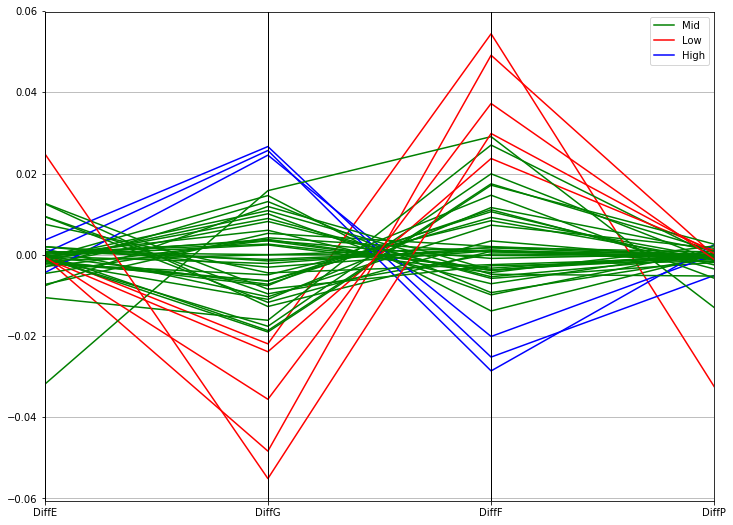

In [217]:
plt.figure(num=1, figsize=(12, 9));
ax = pd.plotting.parallel_coordinates(TPM_Diffs,'class',color=['green','red','blue']);

Including the PM identity in the model had a modest effect on the probabilities of predictions, with some PMs showing a 5-percentage-point shift in probabilities.

In [218]:
TestProbs = TestProbs.join(y)

In [219]:
drops = ['Program Manager ID','DiffE','DiffG','DiffF','DiffP']

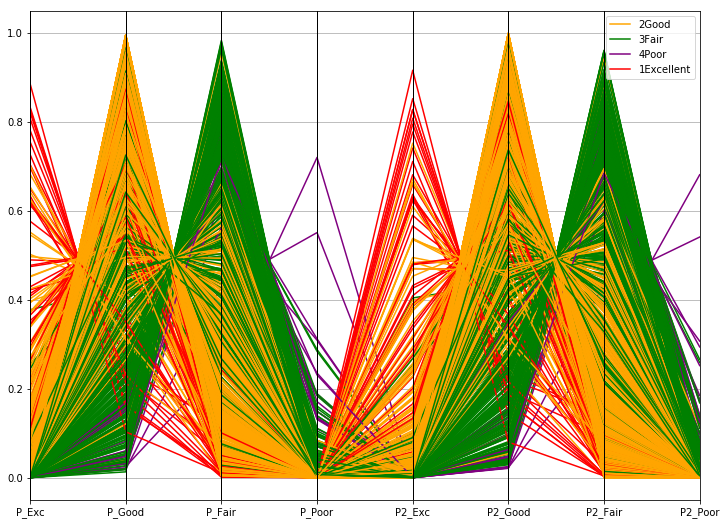

In [221]:
plt.figure(num=1, figsize=(12, 9));
ax = pd.plotting.parallel_coordinates(TestProbs.drop(drops,axis=1),'Overall Rating for Site Summary', color=['orange','green','purple','red']);

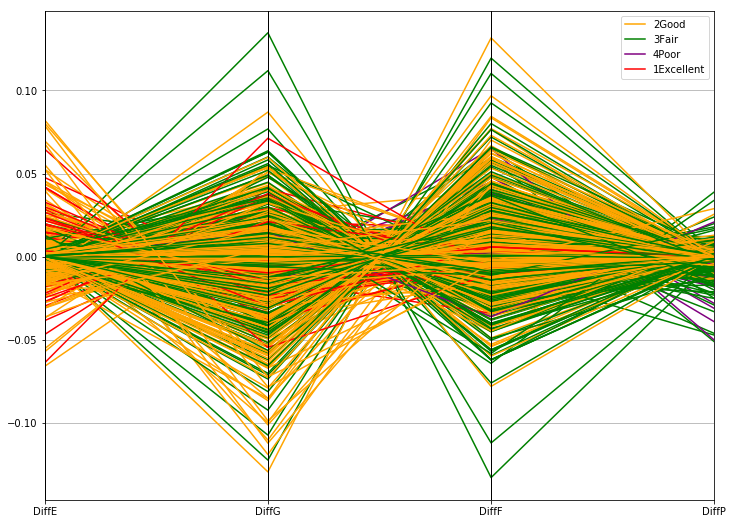

In [223]:
plt.figure(num=1, figsize=(12, 9));
ax = pd.plotting.parallel_coordinates(TestProbs[['Overall Rating for Site Summary','DiffE','DiffG','DiffF','DiffP']],'Overall Rating for Site Summary', color=['orange','green','purple','red']);

It appears that including the PM identity actually lowers the probability of the evaluator's rating. This attempt is abandoned.

In [227]:
TestProbs[TestProbs['Overall Rating for Site Summary'] == '3Fair'].DiffP.mean()

-0.0016724137931034481

In [228]:
TestProbs[TestProbs['Overall Rating for Site Summary'] != '3Fair'].DiffP.mean()

-0.00028273809523809523

Model including PM identity appears to add no more value

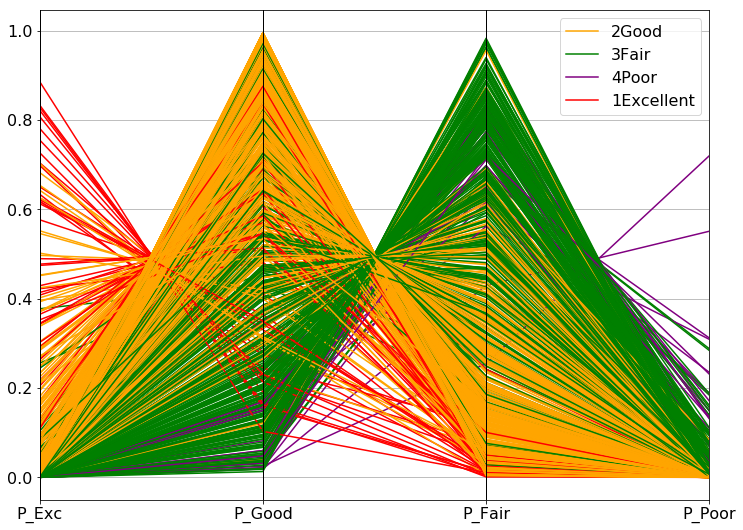

In [231]:
plt.figure(num=1, figsize=(12, 9));
ax = pd.plotting.parallel_coordinates(TestProbs[['Overall Rating for Site Summary','P_Exc','P_Good','P_Fair','P_Poor']],'Overall Rating for Site Summary', color=['orange','green','purple','red']);

This plot shows the probabilities the base model (without PM identity) gave for each rating, color-coded by the actual evaluator's rating. The model does a relatively good job with Good and Fair ratings. Poor ratings are very difficult because of the infrequency.

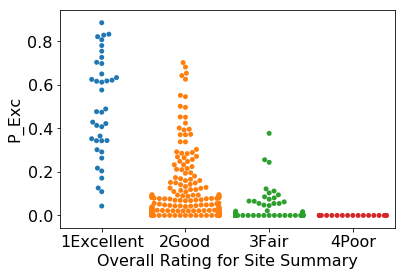

In [230]:
sns.swarmplot(x='Overall Rating for Site Summary',y='P_Exc',data=TestProbs,order=['1Excellent','2Good','3Fair','4Poor']);

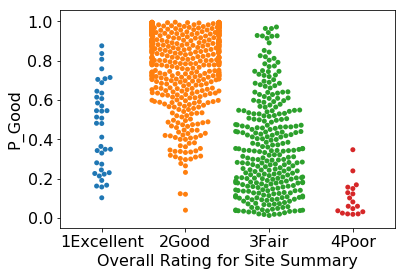

In [232]:
sns.swarmplot(x='Overall Rating for Site Summary',y='P_Good',data=TestProbs,order=['1Excellent','2Good','3Fair','4Poor']);

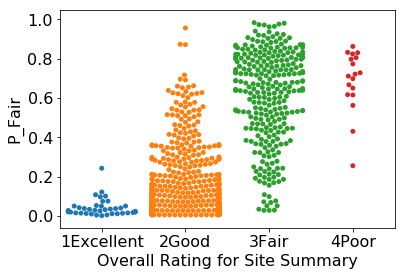

In [233]:
sns.swarmplot(x='Overall Rating for Site Summary',y='P_Fair',data=TestProbs,order=['1Excellent','2Good','3Fair','4Poor']);

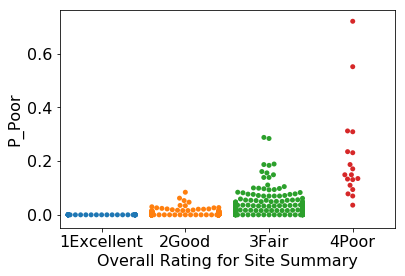

In [234]:
sns.swarmplot(x='Overall Rating for Site Summary',y='P_Poor',data=TestProbs,order=['1Excellent','2Good','3Fair','4Poor']);

Swarm plots give another method of visualizing the same results.

## Examining Mismatch

In [248]:
TestProbs = TestProbs.join(df_raw['Evaluation ID'])

In [249]:
TestProbs[(TestProbs['P_Exc']>.6) & (TestProbs['Overall Rating for Site Summary']!='1Excellent')]

P_Exc    P_Good    P_Fair  P_Poor  P2_Exc  P2_Good  P2_Fair  P2_Poor  \
1187  0.642850  0.300150  0.057000     0.0   0.625    0.314    0.060    0.001   
1191  0.702788  0.232213  0.065000     0.0   0.672    0.283    0.045    0.000   
737   0.682288  0.311713  0.006000     0.0   0.752    0.245    0.003    0.000   
378   0.654000  0.310000  0.036000     0.0   0.664    0.307    0.028    0.001   
576   0.626270  0.315055  0.058675     0.0   0.610    0.314    0.076    0.000   

         DiffE     DiffG     DiffF  DiffP  Program Manager ID  \
1187 -0.017850  0.013850  0.003000  0.001               792.0   
1191 -0.030787  0.050787 -0.020000  0.000               793.0   
737   0.069712 -0.066713 -0.003000  0.000               617.0   
378   0.010000 -0.003000 -0.008000  0.001               520.0   
576  -0.016270 -0.001055  0.017325  0.000               799.0   

     Overall Rating for Site Summary  Evaluation ID  
1187                           2Good          15154  
1191                           2Good          15283  
737                            2Good          11658  
378                            2Good          12944  
576                            2Good          13463

In [250]:
TestProbs[(TestProbs['P_Good']>.6) & (TestProbs['Overall Rating for Site Summary']!='2Good')].drop('P2_Exc',axis=1)

P_Exc    P_Good    P_Fair  P_Poor  P2_Good  P2_Fair  P2_Poor  \
4     0.000159  0.608877  0.378964   0.012    0.602    0.390    0.008   
235   0.002464  0.784343  0.212193   0.001    0.767    0.231    0.002   
1698  0.000076  0.635212  0.363712   0.001    0.689    0.307    0.004   
351   0.000264  0.746094  0.239641   0.014    0.624    0.359    0.017   
170   0.343566  0.614616  0.041818   0.000    0.637    0.049    0.000   
114   0.000151  0.749622  0.242227   0.008    0.704    0.292    0.004   
1195  0.122109  0.703529  0.174362   0.000    0.662    0.209    0.000   
667   0.103500  0.685500  0.208000   0.003    0.714    0.192    0.002   
970   0.001696  0.820409  0.175895   0.002    0.795    0.202    0.001   
1403  0.045541  0.852295  0.098164   0.004    0.884    0.086    0.002   
147   0.217405  0.708387  0.074208   0.000    0.689    0.085    0.000   
424   0.000218  0.744562  0.240220   0.015    0.744    0.241    0.015   
210   0.112069  0.640202  0.241729   0.006    0.643    0.254    0.004   
1124  0.047598  0.924365  0.028038   0.000    0.927    0.035    0.000   
245   0.001102  0.670052  0.322847   0.006    0.563    0.433    0.004   
1587  0.080638  0.640168  0.278193   0.001    0.615    0.295    0.001   
148   0.000234  0.890822  0.107944   0.001    0.829    0.168    0.003   
966   0.000106  0.608423  0.391471   0.000    0.568    0.432    0.000   
1355  0.204320  0.758859  0.036821   0.000    0.780    0.054    0.000   
16    0.001067  0.661443  0.335490   0.002    0.647    0.351    0.002   
587   0.171361  0.807690  0.020949   0.000    0.779    0.021    0.000   
78    0.000067  0.731016  0.262917   0.006    0.724    0.269    0.005   
1599  0.054942  0.746240  0.196818   0.002    0.734    0.219    0.000   
1004  0.003696  0.825477  0.168827   0.002    0.774    0.212    0.004   
1451  0.094445  0.690207  0.210348   0.005    0.738    0.178    0.005   
1537  0.000131  0.695888  0.300981   0.003    0.643    0.350    0.006   
512   0.002638  0.812007  0.185355   0.000    0.764    0.233    0.002   
1481  0.000060  0.638789  0.354152   0.007    0.639    0.355    0.006   
1600  0.000270  0.843727  0.156003   0.000    0.786    0.214    0.000   
1401  0.002899  0.928250  0.067851   0.001    0.898    0.100    0.001   
1162  0.292022  0.688272  0.019707   0.000    0.708    0.017    0.000   
1669  0.009280  0.791859  0.195861   0.003    0.828    0.163    0.006   
705   0.000156  0.678064  0.321779   0.000    0.648    0.352    0.000   
187   0.343207  0.607255  0.049539   0.000    0.569    0.046    0.000   
629   0.043004  0.714646  0.242350   0.000    0.704    0.238    0.000   
1480  0.055000  0.628000  0.308000   0.009    0.605    0.322    0.007   
1603  0.003237  0.617990  0.366772   0.012    0.625    0.360    0.013   
1287  0.000364  0.673088  0.325548   0.001    0.581    0.418    0.001   
1735  0.021501  0.926608  0.050891   0.001    0.930    0.055    0.000   
1153  0.065067  0.610701  0.322232   0.002    0.571    0.346    0.000   
899   0.019418  0.727387  0.249196   0.004    0.702    0.277    0.004   
1618  0.006612  0.964056  0.029333   0.000    0.962    0.033    0.000   
660   0.000311  0.685147  0.305542   0.009    0.662    0.326    0.012   
1263  0.000121  0.773281  0.223598   0.003    0.742    0.255    0.003   
1236  0.001670  0.925964  0.071366   0.001    0.919    0.079    0.001   
930   0.000155  0.943123  0.050723   0.006    0.909    0.088    0.003   
678   0.001309  0.770190  0.226501   0.002    0.760    0.234    0.006   
668   0.002374  0.802697  0.185929   0.009    0.807    0.184    0.006   
90    0.302090  0.645045  0.052865   0.000    0.620    0.045    0.000   
1120  0.344322  0.635396  0.020282   0.000    0.581    0.010    0.000   
459   0.055155  0.719427  0.225418   0.000    0.680    0.270    0.002   
1445  0.002558  0.963585  0.033857   0.000    0.951    0.047    0.000   
925   0.001137  0.628211  0.364652   0.006    0.572    0.405    0.009   
1646  0.263540  0.704883  0.031576   0.000    0.726    0.035    0.0

In [251]:
TestProbs[(TestProbs['P_Fair']>.6) & (TestProbs['Overall Rating for Site Summary']!='3Fair')].drop('P2_Exc',axis=1)

P_Exc    P_Good    P_Fair    P_Poor  P2_Good  P2_Fair  P2_Poor  \
105   0.000354  0.303028  0.691618  0.005000    0.273    0.717    0.010   
1193  0.000000  0.082000  0.824000  0.094000    0.062    0.872    0.066   
1685  0.000000  0.338625  0.627375  0.034000    0.302    0.658    0.040   
1756  0.000000  0.123000  0.728000  0.149000    0.109    0.773    0.118   
355   0.000036  0.367726  0.621238  0.011000    0.400    0.587    0.013   
1569  0.000000  0.021000  0.667000  0.312000    0.025    0.681    0.294   
844   0.000000  0.335912  0.660088  0.004000    0.340    0.658    0.002   
790   0.000275  0.333311  0.651414  0.015000    0.339    0.641    0.020   
643   0.000000  0.239852  0.650148  0.110000    0.234    0.665    0.101   
1526  0.000032  0.353828  0.638141  0.008000    0.363    0.629    0.008   
1610  0.000000  0.037000  0.832000  0.131000    0.021    0.855    0.124   
1429  0.000000  0.150000  0.615000  0.235000    0.135    0.680    0.185   
1297  0.000000  0.123800  0.871200  0.005000    0.096    0.897    0.007   
214   0.000000  0.102000  0.711000  0.187000    0.096    0.730    0.174   
1764  0.000000  0.060000  0.862000  0.078000    0.046    0.869    0.085   
1219  0.000000  0.021000  0.830000  0.149000    0.022    0.837    0.141   
1626  0.000000  0.032000  0.797000  0.171000    0.041    0.788    0.171   
842   0.000000  0.040000  0.956000  0.004000    0.054    0.942    0.004   
724   0.001329  0.362488  0.622850  0.013333    0.382    0.578    0.039   
179   0.000007  0.265336  0.716657  0.018000    0.286    0.695    0.019   
1638  0.000023  0.341628  0.655349  0.003000    0.362    0.636    0.002   
1666  0.000021  0.339161  0.625818  0.035000    0.325    0.649    0.026   
1215  0.000000  0.157000  0.773000  0.070000    0.143    0.789    0.068   
1013  0.000000  0.060000  0.805000  0.135000    0.048    0.812    0.140   
501   0.000000  0.382719  0.601281  0.016000    0.324    0.668    0.008   
1058  0.000000  0.277383  0.695617  0.027000    0.268    0.692    0.040   
50    0.000000  0.169000  0.698000  0.133000    0.154    0.721    0.125   
863   0.000000  0.121000  0.873000  0.006000    0.112    0.878    0.010   
140   0.000000  0.319000  0.662000  0.019000    0.349    0.633    0.018   
125   0.000019  0.347431  0.616550  0.036000    0.349    0.619    0.032   
92    0.000026  0.380074  0.611900  0.008000    0.356    0.633    0.011   
1059  0.000000  0.297214  0.618786  0.084000    0.271    0.616    0.113   
1765  0.000000  0.048000  0.721000  0.231000    0.063    0.685    0.252   
1131  0.000000  0.346000  0.633000  0.021000    0.339    0.628    0.032   

         DiffE     DiffG     DiffF     DiffP  Program Manager ID  \
105  -0.000354 -0.030028  0.025382  0.005000               409.0   
1193  0.000000 -0.020000  0.048000 -0.028000               677.0   
1685  0.000000 -0.036625  0.030625  0.006000               633.0   
1756  0.000000 -0.014000  0.045000 -0.031000               790.0   
355  -0.000036  0.032274 -0.034238  0.002000               788.0   
1569  0.000000  0.004000  0.014000 -0.018000               616.0   
844   0.000000  0.004088 -0.002088 -0.002000               791.0   
790  -0.000275  0.005689 -0.010414  0.005000               798.0   
643   0.000000 -0.005852  0.014852 -0.009000               633.0   
1526 -0.000032  0.009172 -0.009141  0.000000               788.0   
1610  0.000000 -0.016000  0.023000 -0.007000               788.0   
1429  0.000000 -0.015000  0.065000 -0.050000               542.0   
1297  0.000000 -0.027800  0.025800  0.002000               633.0   
214   0.000000 -0.006000  0.019000 -0.013000               793.0   
1764  0.000000 -0.014000  0.007000  0.007000               677.0   
1219  0.000000  0.001000  0.007000 -0.008000               616.0   
1626  0.000000  0.009000 -0.009000  0.000000               677.0   
842   0.000000  0.014000 -0.014000  0.000000               649.0   
724  -0.000329  0.019512 -0.044850  0.025667               605.0   
179  -0.000007  0.02066

In [252]:
TestProbs[(TestProbs['P_Poor']>.6) & (TestProbs['Overall Rating for Site Summary']!='4Poor')].drop('P2_Exc',axis=1)

Empty DataFrame
Columns: [P_Exc, P_Good, P_Fair, P_Poor, P2_Good, P2_Fair, P2_Poor, DiffE, DiffG, DiffF, DiffP, Program Manager ID, Overall Rating for Site Summary, Evaluation ID]
Index: []

Mismatch can be examined where the model predicted a 60% or greater probability of a particular rating, but the evaluator gave a different rating. A few examples appear to indicate that these may be human errors (where the overall rating is not properly supported by the indicators) rather than model error (where the model has predicted the wrong rating).

## Repeat modeling for other half

In [253]:
nrf = RandomForestClassifier(n_estimators=1000)

In [254]:
ngrid = GridSearchCV(nrf,param_grid=params)

In [255]:
ngrid.fit(X_test,y_test)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [5, 10, 20, 30, 40, 50, 60, 70, 80]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [256]:
npred = ngrid.predict(X_test)

In [257]:
print(classification_report(y_test,npred))

             precision    recall  f1-score   support

 1Excellent       1.00      1.00      1.00        39
      2Good       1.00      1.00      1.00       503
      3Fair       1.00      1.00      1.00       290
      4Poor       1.00      1.00      1.00        18

avg / total       1.00      1.00      1.00       850



In [258]:
npred2 = ngrid.predict(X_train)

In [259]:
print(classification_report(y_train,npred2))

             precision    recall  f1-score   support

 1Excellent       0.78      0.67      0.72        43
      2Good       0.86      0.89      0.87       492
      3Fair       0.81      0.80      0.80       301
      4Poor       1.00      0.14      0.25        14

avg / total       0.84      0.84      0.83       850



In [260]:
#create probabilities from test set for each rating
trainprobs = ngrid.predict_proba(X_train)

#arrange as dataframe
TrainProbs = pd.DataFrame(data=trainprobs, index=X_train.index, columns=['P_Exc', 'P_Good', 'P_Fair', 'P_Poor'])

#add PM IDs
TrainProbs = TrainProbs.join(PM)

nrf3=RandomForestClassifier(n_estimators=1000)

ngrid3=GridSearchCV(nrf3,param_grid=params)

In [261]:
ngrid3.fit(newX_test,y_test)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [5, 10, 20, 30, 40, 50, 60, 70, 80]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [262]:
npred3 = ngrid3.predict(newX_train)
print(classification_report(y_train, npred3))

             precision    recall  f1-score   support

 1Excellent       0.78      0.65      0.71        43
      2Good       0.85      0.89      0.87       492
      3Fair       0.81      0.80      0.80       301
      4Poor       1.00      0.14      0.25        14

avg / total       0.84      0.83      0.83       850



In [263]:
TrainProbs.drop(PM,inplace=True,axis=1)

In [264]:
TrainProbs = TrainProbs.join(sections['Overall Rating for Site Summary'])

In [265]:
TrainProbs.head()

P_Exc  P_Good  P_Fair  P_Poor Overall Rating for Site Summary
909   0.001   0.996   0.003   0.000                           2Good
1241  0.001   0.618   0.380   0.001                           2Good
665   0.000   0.289   0.696   0.015                           3Fair
1373  0.000   0.970   0.030   0.000                           2Good
638   0.000   0.529   0.471   0.000                           3Fair

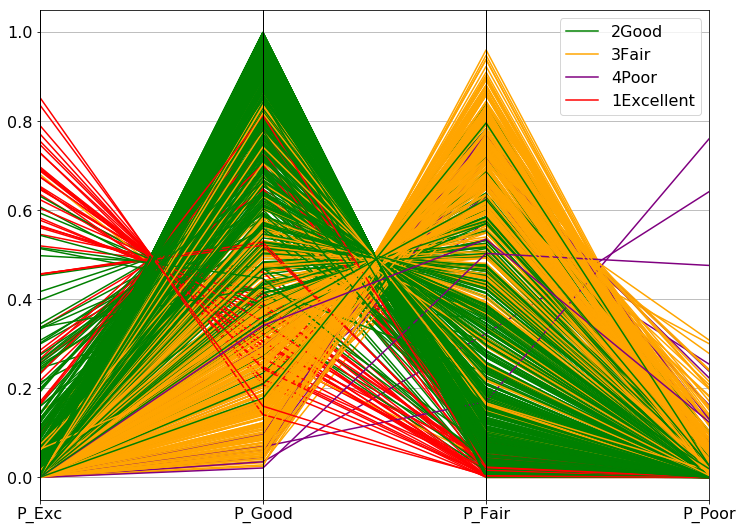

In [267]:
matplotlib.rcParams.update({'font.size': 16})
plt.figure(num=1, figsize=(12, 9));
ax = pd.plotting.parallel_coordinates(TrainProbs[['Overall Rating for Site Summary','P_Exc','P_Good','P_Fair','P_Poor']],'Overall Rating for Site Summary', color=['green','orange','purple','red']);

In [268]:
TrainProbs = TrainProbs.join(df_raw['Evaluation ID'])

In [269]:
TrainProbs = TrainProbs.join(df_raw['Program Manager ID'])

In [270]:
TrainProbs[(TrainProbs['P_Exc']>.6) & (TrainProbs['Overall Rating for Site Summary']!='1Excellent')]

P_Exc  P_Good  P_Fair  P_Poor Overall Rating for Site Summary  \
1631  0.608   0.343   0.049   0.000                           2Good   
1352  0.632   0.353   0.015   0.000                           2Good   
1095  0.681   0.276   0.042   0.001                           3Fair   

      Evaluation ID  Program Manager ID  
1631          15847               638.0  
1352          15614               633.0  
1095          14987               799.0

In [271]:
TrainProbs[(TrainProbs['P_Good']>.6) & (TrainProbs['Overall Rating for Site Summary']!='2Good')]

P_Exc  P_Good  P_Fair  P_Poor Overall Rating for Site Summary  \
1170  0.007   0.747   0.233   0.013                           3Fair   
1709  0.004   0.676   0.312   0.008                           3Fair   
945   0.256   0.649   0.095   0.000                      1Excellent   
1466  0.000   0.834   0.161   0.005                           3Fair   
1394  0.285   0.663   0.052   0.000                      1Excellent   
1598  0.014   0.603   0.380   0.003                           3Fair   
642   0.335   0.633   0.032   0.000                      1Excellent   
1107  0.000   0.745   0.246   0.009                           3Fair   
1716  0.000   0.669   0.320   0.011                           3Fair   
1518  0.008   0.805   0.182   0.005                           3Fair   
521   0.098   0.845   0.057   0.000                      1Excellent   
891   0.026   0.665   0.303   0.006                           3Fair   
141   0.000   0.617   0.368   0.015                           3Fair   
608   0.111   0.666   0.217   0.006                           3Fair   
1364  0.000   0.602   0.393   0.005                           3Fair   
1221  0.001   0.602   0.386   0.011                           3Fair   
681   0.006   0.754   0.240   0.000                           3Fair   
1121  0.265   0.726   0.009   0.000                      1Excellent   
862   0.000   0.810   0.190   0.000                           3Fair   
720   0.162   0.782   0.056   0.000                      1Excellent   
1159  0.001   0.865   0.134   0.000                           3Fair   
1033  0.000   0.826   0.174   0.000                           3Fair   
36    0.011   0.740   0.249   0.000                           3Fair   
368   0.277   0.646   0.077   0.000                      1Excellent   
758   0.216   0.703   0.081   0.000                      1Excellent   
375   0.003   0.895   0.102   0.000                           3Fair   
674   0.002   0.824   0.174   0.000                           3Fair   
895   0.000   0.660   0.338   0.002                           3Fair   
1098  0.232   0.734   0.034   0.000                      1Excellent   
17    0.000   0.834   0.165   0.001                           3Fair   
293   0.000   0.847   0.151   0.002                           3Fair   
1442  0.000   0.947   0.053   0.000                           3Fair   
659   0.001   0.705   0.293   0.001                           3Fair   
173   0.000   0.604   0.394   0.002                           3Fair   
853   0.169   0.779   0.052   0.000                      1Excellent   
154   0.003   0.777   0.219   0.001                           3Fair   
428   0.000   0.837   0.163   0.000                           3Fair   
272   0.060   0.632   0.305   0.003                           3Fair   
457   0.164   0.813   0.023   0.000                      1Excellent   
834   0.000   0.818   0.167   0.015                           3Fair   
1623  0.002   0.742   0.252   0.004                           3Fair   

      Evaluation ID  Program Manager ID  
1170          15126               792.0  
1709          16182               793.0  
945           14629               793.0  
1466          15545               660.0  
1394          15421               660.0  
1598          15744               638.0  
642           13573               799.0  
1107          15005               792.0  
1716          16235               629.0  
1518          15960               793.0  
521           13117               799.0  
891           14259               793.0  
141           12268               799.0  
608           13523               799.0  
1364          15522               799.0  
1221          15211               792.0  
681           13470               653.0  
1121          15100               662.0  
862           14924               394.0  
720           13856               793.0  
1159          14061               805.0  
1033          14831               480.0  
36            11913               657.0  
368           1

In [272]:
TrainProbs[(TrainProbs['P_Fair']>.6) & (TrainProbs['Overall Rating for Site Summary']!='3Fair')]

P_Exc  P_Good  P_Fair  P_Poor Overall Rating for Site Summary  \
268   0.023   0.282   0.689   0.006                           2Good   
290   0.000   0.207   0.674   0.119                           4Poor   
216   0.000   0.159   0.679   0.162                           4Poor   
55    0.000   0.045   0.717   0.238                           4Poor   
244   0.004   0.234   0.753   0.009                           2Good   
260   0.000   0.319   0.679   0.002                           2Good   
101   0.004   0.377   0.608   0.011                           2Good   
257   0.000   0.362   0.632   0.006                           2Good   
359   0.000   0.247   0.747   0.006                           2Good   
1498  0.000   0.216   0.783   0.001                           2Good   
699   0.000   0.229   0.771   0.000                           2Good   
168   0.000   0.296   0.703   0.001                           2Good   
1454  0.000   0.195   0.780   0.025                           4Poor   
1115  0.000   0.291   0.630   0.079                           4Poor   
1637  0.000   0.169   0.782   0.049                           4Poor   
453   0.000   0.346   0.639   0.015                           2Good   
1087  0.003   0.330   0.667   0.000                           2Good   
227   0.003   0.295   0.658   0.044                           4Poor   
124   0.001   0.356   0.632   0.011                           2Good   
178   0.000   0.338   0.649   0.013                           2Good   
71    0.002   0.358   0.631   0.009                           2Good   
436   0.000   0.273   0.720   0.007                           2Good   
319   0.000   0.152   0.840   0.008                           2Good   
1547  0.000   0.061   0.716   0.223                           4Poor   
113   0.000   0.098   0.772   0.130                           4Poor   
385   0.002   0.382   0.613   0.003                           2Good   
1595  0.000   0.210   0.686   0.104                           2Good   
499   0.000   0.178   0.796   0.026                           2Good   
1030  0.000   0.350   0.624   0.026                           2Good   

      Evaluation ID  Program Manager ID  
268           12507               804.0  
290           12648               584.0  
216           11809               619.0  
55            12084               789.0  
244           12601               792.0  
260           12777               480.0  
101           11710               639.0  
257           12503               394.0  
359           12887               616.0  
1498          14225               404.0  
699           13778               480.0  
168           11713               639.0  
1454          15663               605.0  
1115          14889               584.0  
1637          15885               619.0  
453           12978               797.0  
1087          14736               639.0  
227           12718               799.0  
124           12196               638.0  
178           12431               788.0  
71            12068               802.0  
436           12866               677.0  
319           12622               520.0  
1547          15883               657.0  
113           12253               804.0  
385           12788               804.0  
1595          15708               798.0  
499           12995               657.0  
1030          14699               802.0

In [273]:
TrainProbs[(TrainProbs['P_Poor']>.6) & (TrainProbs['Overall Rating for Site Summary']!='4Poor')]

Empty DataFrame
Columns: [P_Exc, P_Good, P_Fair, P_Poor, Overall Rating for Site Summary, Evaluation ID, Program Manager ID]
Index: []

In [274]:
df_raw.groupby(['Program Manager ID']).size()

Program Manager ID
390.0     2
394.0    43
402.0     1
404.0    47
409.0    45
415.0     2
480.0    48
520.0    48
542.0     4
583.0     5
584.0     6
605.0    46
616.0    51
617.0    41
619.0    49
620.0    49
624.0    51
629.0    51
630.0     3
631.0    47
632.0     2
633.0    48
636.0    38
637.0     4
638.0    49
639.0    47
649.0    47
651.0     7
653.0    24
657.0    47
660.0    48
662.0    27
677.0    54
706.0     2
787.0    49
788.0    46
789.0    50
790.0    50
791.0    47
792.0    51
793.0    52
797.0    27
798.0    44
799.0    45
801.0    51
802.0    51
804.0    51
805.0    47
811.0     5
dtype: int64

In [275]:
#Load file with mismatch by PM
dfs = pd.read_excel('pqmt3.xlsx')

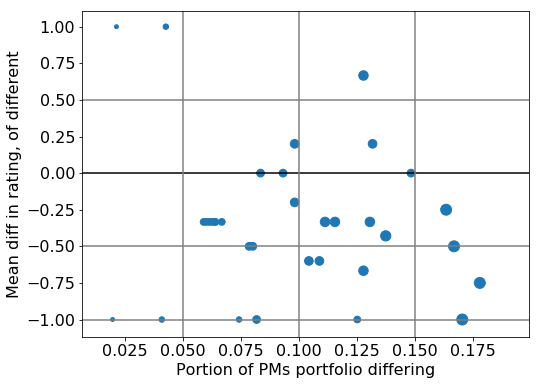

In [276]:
plt.figure(num=1, figsize=(8, 6));
plt.scatter(dfs['Percent'],dfs['Avg']*2-1,s=dfs['Number']*15);
plt.ylabel('Mean diff in rating, of different');
plt.xlabel('Portion of PMs portfolio differing');
plt.axhline(y=.5,color='gray');
plt.axhline(y=0,color='black');
plt.axhline(y=-.5,color='gray');
plt.axhline(y=-1,color='gray');
plt.axvline(x=.05,color='gray');
plt.axvline(x=.1,color='gray');
plt.axvline(x=.15,color='gray');

## Conclusion and Next Steps

The Random Forest Classifier gave the best model for predicting ratings based on the indicators, with an F1 score at .83 and .8 for the two halves of data. The importance of specific features roughly followed expectations. Enrollment, Rate of Participation, and average activity scores provided the most important features, with the program descriptions following. The most important Yes/No indicator was entering participant data on time and accurately. Visit number was an important feature. Further exploration can show the specific effect of changing values in these indicators.

Mismatch can be an effective tool for flagging potentially erroneous evaluations. Further review is needed to determine if specific PMs are consistently rating differently from their peers, as appears in the last chart.